In [1]:
pip install pandas numpy matplotlib scikit-learn statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 4.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.0 MB 6.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.0 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.0 MB 6.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
df= pd.read_csv(r'E:\USER\HP\Desktop\DATA ANALYTICS\IBM\Project\Unemployement\Prediction_parameters.csv')
df

,Year,Indian Population(billions),GDP Per capita(crores),Inflation rate(%),Total EPFO Accounts (lakhs),Unemployment rate
0,2023,1428627663,295000,0.0438,3918.28,4.17
1,2022,1417173173,342000,0.0665,3910.56,4.82
2,2021,1407563842,315000,0.0551,2669.56,6.38
3,2020,1396387127,267000,0.0617,2666.86,7.86
4,2019,1383112050,284000,0.0477,2664.40,6.51
5,2018,1369003306,270000,0.0341,2663.24,7.65
6,2017,1354195680,265000,0.0359,2662.21,7.72
7,2016,1338636340,229000,0.0453,2560.90,7.80
8,2015,1291132063,210000,0.0491,1674.65,7.89
9,2014,1307246509,204000,0.0583,889.94,7.99


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         24 non-null     int64  
 1   Indian Population(billions)  24 non-null     int64  
 2   GDP Per capita(crores)       24 non-null     int64  
 3   Inflation rate(%)            24 non-null     float64
 4   Total EPFO Accounts (lakhs)  24 non-null     float64
 5   Unemployment rate            24 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.3 KB


# create forecast model

In [32]:
df.describe()

,Year,Indian Population(billions),GDP Per capita(crores),Inflation rate(%),Total EPFO Accounts (lakhs),Unemployment rate
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,1.258109e+09,176276.083333,0.060483,1399.547500,7.704167
std,7.071068,1.147530e+08,92982.213075,0.024471,1210.498989,1.140232
min,2000.000000,1.059634e+09,46839.000000,0.034100,263.010000,4.170000
25%,2005.750000,1.167940e+09,91029.000000,0.042275,440.512500,7.757500
50%,2011.500000,1.266054e+09,182500.000000,0.052100,871.310000,8.040000
75%,2017.250000,1.357898e+09,265500.000000,0.070525,2662.467500,8.352500
max,2023.000000,1.428628e+09,342000.000000,0.123100,3918.280000,8.700000


In [27]:
X = df[['Indian Population(billions)', 'GDP Per capita(crores)', 'Inflation rate(%)', 'Total EPFO Accounts (lakhs)']]
y = df['Unemployment rate']


model = LinearRegression()
model.fit(X, y)

future_data = pd.DataFrame({
    'Indian Population(billions)': [1450000000, 1470000000],  
    'GDP Per capita(crores)': [300000, 320000],
    'Inflation rate(%)': [5, 4],
    'Total EPFO Accounts (lakhs)': [4000, 4200]
})

predictions = model.predict(future_data)
print("Predictions for 2024 and 2025:", predictions)

Predictions for 2024 and 2025: [-50.95451828 -39.67920349]


# plot the AutoRegression

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


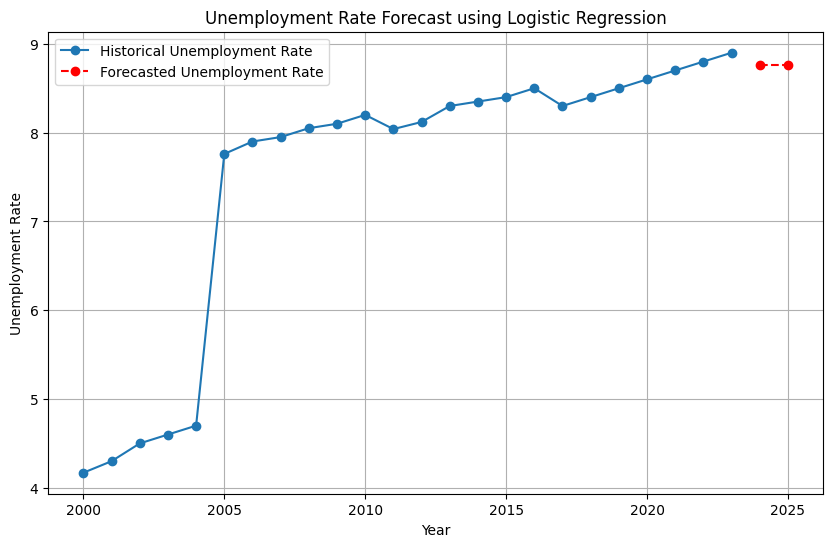

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AutoRegResults
from sklearn.metrics import mean_squared_error

# Sample data loading
data = {
    'Year': ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    'Unemployment rate': [4.17, 4.30, 4.50, 4.60, 4.70, 7.76, 7.90, 7.95, 8.05, 8.10, 8.20, 8.04, 8.12, 8.30, 8.35, 8.40, 8.50, 8.30, 8.40, 8.50, 8.60, 8.70, 8.80, 8.90]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Year' to numeric format
df['Year'] = pd.to_numeric(df['Year'])
df.set_index('Year', inplace=True)

# Fit an autoregressive model
model = AutoReg(df['Unemployment rate'], lags=1)  # You can adjust the number of lags as needed
model_fitted = model.fit()

# Forecasting for the next 2 years
forecast = model_fitted.predict(start=df.index[-1] + 1, end=df.index[-1] + 2)

# Create a DataFrame to hold the forecasted values
forecast_df = pd.DataFrame({
    'Year': [df.index[-1] + 1, df.index[-1] + 2],
    'Unemployment rate': forecast
})

# Combine the original data with the forecasted data for plotting
combined_df = pd.concat([df, forecast_df.set_index('Year')])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Unemployment rate'], label='Historical Unemployment Rate', marker='o')
plt.plot(forecast_df['Year'], forecast_df['Unemployment rate'], label='Forecasted Unemployment Rate', marker='o', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecast using Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/614.7 kB 512.0 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 602.4 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/614.7 kB 602.4 kB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Plot the AutoARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46.889, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48.883, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48.883, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=47.329, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.165 seconds


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


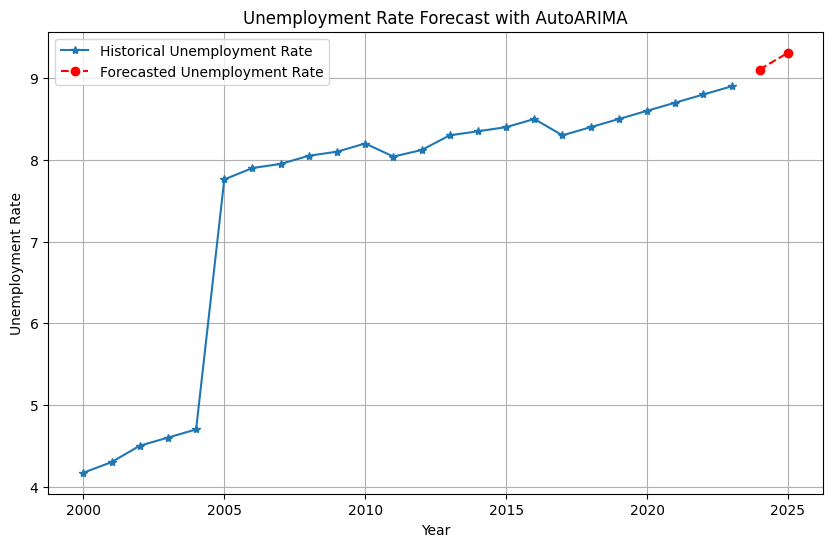

Model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -21.445
Date:                Sun, 04 Aug 2024   AIC                             46.889
Time:                        17:58:25   BIC                             49.160
Sample:                             0   HQIC                            47.461
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2057      0.780      0.264      0.792      -1.324       1.735
sigma2         0.3779      0.219      1.727      0.084      -0.051       0.807
Ljung-Box (L1) (Q):                  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

data = {
    'Year': ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    'Unemployment rate': [4.17, 4.30, 4.50, 4.60, 4.70, 7.76, 7.90, 7.95, 8.05, 8.10, 8.20, 8.04, 8.12, 8.30, 8.35, 8.40, 8.50, 8.30, 8.40, 8.50, 8.60, 8.70, 8.80, 8.90]
}

df = pd.DataFrame(data)

# Convert 'Year' to numeric format and set as index
df['Year'] = pd.to_numeric(df['Year'])
df.set_index('Year', inplace=True)

model = auto_arima(df['Unemployment rate'], seasonal=False, stepwise=True, trace=True)

n_periods = 2
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

forecast_df = pd.DataFrame({
    'Year': [df.index[-1] + 1, df.index[-1] + 2],
    'Unemployment rate': forecast
})

combined_df = pd.concat([df, forecast_df.set_index('Year')])
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Unemployment rate'], label='Historical Unemployment Rate', marker='*')
plt.plot(forecast_df['Year'], forecast_df['Unemployment rate'], label='Forecasted Unemployment Rate', marker='o', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecast with AutoARIMA')
plt.legend()
plt.grid(True)
plt.show()

print("Model summary:")
print(model.summary())